In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.util import ngrams
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import sklearn.feature_extraction.text as text
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
import xgboost
from sklearn import decomposition, ensemble
import pandas, numpy, textblob, string
import re
import nltk
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

In [2]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_csv("./eng_dataset.csv")
data

,ID,sentiment,content
0,10941,anger,At the point today where if someone says somet...
1,10942,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,10943,anger,This game has pissed me off more than any othe...
3,10944,anger,@spamvicious I've just found out it's Candice ...
4,10945,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...
...,...,...,...
7097,40781,sadness,@VivienLloyd Thank you so much! Just home - st...
7098,40782,sadness,Just put the winter duvet on ☃️❄️🌬☔️
7099,40783,sadness,@SilkInSide @TommyJoeRatliff that's so pretty!...
7100,40784,sadness,@BluesfestByron second artist announcement loo...


In [4]:
data["sentiment"].value_counts()

fear       2252
anger      1701
joy        1616
sadness    1533
Name: sentiment, dtype: int64

In [5]:
copy = data.copy()

In [6]:
data.head()

,ID,sentiment,content
0,10941,anger,At the point today where if someone says somet...
1,10942,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,10943,anger,This game has pissed me off more than any othe...
3,10944,anger,@spamvicious I've just found out it's Candice ...
4,10945,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...


# Preprocessing

In [7]:
data[["content"]]

,content
0,At the point today where if someone says somet...
1,@CorningFootball IT'S GAME DAY!!!! T MIN...
2,This game has pissed me off more than any othe...
3,@spamvicious I've just found out it's Candice ...
4,@moocowward @mrsajhargreaves @Melly77 @GaryBar...
...,...
7097,@VivienLloyd Thank you so much! Just home - st...
7098,Just put the winter duvet on ☃️❄️🌬☔️
7099,@SilkInSide @TommyJoeRatliff that's so pretty!...
7100,@BluesfestByron second artist announcement loo...


### lowercase


In [8]:
#convert uppercase letters to lower case
data['content'] = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
data[["content"]].head()

,content
0,at the point today where if someone says somet...
1,@corningfootball it's game day!!!! t minus 14:...
2,this game has pissed me off more than any othe...
3,@spamvicious i've just found out it's candice ...
4,@moocowward @mrsajhargreaves @melly77 @garybar...


### removing special characters and ponctuation

In [10]:
#remove white spaces and special characters
data['content'] = data['content'].str.replace('[^\w\s]','')

C:\Users\user\AppData\Local\Temp\ipykernel_5128\2675422991.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.replace('[^\w\s]','')


In [11]:
data[["content"]].head()


,content
0,at the point today where if someone says somet...
1,corningfootball its game day t minus 1430 rele...
2,this game has pissed me off more than any othe...
3,spamvicious ive just found out its candice and...
4,moocowward mrsajhargreaves melly77 garybarlow ...


### removing stopwords

In [12]:
stop = stopwords.words("english")

In [13]:
data["content"] = data["content"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [14]:
data[["content"]].head()


,content
0,point today someone says something remotely ki...
1,corningfootball game day minus 1430 relentless
2,game pissed game year blood boiling time turn ...
3,spamvicious ive found candice candace pout lik...
4,moocowward mrsajhargreaves melly77 garybarlow ...


### correct spelling


In [15]:
# data[["content"]] = data[["content"]].apply(lambda x: str(TextBlob(x).correct()))

In [16]:
data[["content"]].head()


,content
0,point today someone says something remotely ki...
1,corningfootball game day minus 1430 relentless
2,game pissed game year blood boiling time turn ...
3,spamvicious ive found candice candace pout lik...
4,moocowward mrsajhargreaves melly77 garybarlow ...


### stemming


In [17]:
st = PorterStemmer()
data["content"] = data["content"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [18]:
data[["content"]].head()

,content
0,point today someon say someth remot kind water...
1,corningfootbal game day minu 1430 relentless
2,game piss game year blood boil time turn stlcard
3,spamvici ive found candic candac pout like ðÿ
4,moocowward mrsajhargreav melly77 garybarlow ca...


# label encoding

In [19]:
data["sentiment"].value_counts()

fear       2252
anger      1701
joy        1616
sadness    1533
Name: sentiment, dtype: int64

In [20]:
le = preprocessing.LabelEncoder()
data["sentiment"] = le.fit_transform(data["sentiment"])

In [21]:
data["sentiment"].value_counts()

1    2252
0    1701
2    1616
3    1533
Name: sentiment, dtype: int64

## train_test_split

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data["content"], data["sentiment"], test_size=0.2, random_state=42, stratify=data["sentiment"])

# feature engineering


In [23]:
cv = CountVectorizer()
cv.fit(data["content"])

cv_xtrain = cv.transform(X_train)
cv_xtest = cv.transform(X_test)

In [24]:
tv = TfidfVectorizer()
tv.fit(data["content"])

tv_xtrain = tv.transform(X_train)
tv_xtest = tv.transform(X_test)

# model building phase

In [32]:
def build(model_initializer, independant_variables_train,target ,independant_variables_test, target_test) : 
    model = model_initializer
    model.fit(independant_variables_train,target)
    prediction = model.predict(independant_variables_test)
    return metrics.accuracy_score(prediction, target_test)

### naive bayes


In [33]:
# for CV
output = build(naive_bayes.MultinomialNB(), cv_xtrain, y_train  , cv_xtest, y_test)
print(output)
# for TF-IDF
output = build(naive_bayes.MultinomialNB(), tv_xtrain, y_train, tv_xtest, y_test)
print(output)

0.8451794510907812
0.7698803659394793


### logistic regression



In [34]:
output = build(linear_model.LogisticRegression(), cv_xtrain, y_train, cv_xtest, y_test)
print(output)

output = build(linear_model.LogisticRegression(), tv_xtrain, y_train, tv_xtest , y_test)
print(output)

0.88036593947924
0.8698099929627023


### svm




In [35]:
#for cv
output = build(svm.SVC(), cv_xtrain, y_train, cv_xtest, y_test)
print(output)

#for TF-IDF 
output = build(svm.SVC(), tv_xtrain, y_train, tv_xtest, y_test)
print(output)

0.872624912033779
0.8831808585503167


### random forest




In [36]:
#for CV
output = build(ensemble.RandomForestClassifier(), cv_xtrain, y_train, cv_xtest, y_test)
print(output)

#for TF-IDF 
output = build(ensemble.RandomForestClassifier(), tv_xtrain, y_train, tv_xtest, y_test)
print(output)

0.8768472906403941
0.8669950738916257


# building SVM Model using TF-IDF as features as the accuracy is better compared to other models


In [38]:
classifier = svm.SVC().fit(tv_xtrain, y_train)
val_predictions = classifier.predict(tv_xtest)

# Precision , Recall , F1 - score , Support
y_true, y_pred = y_test, val_predictions
print(classification_report(y_true, y_pred))
print()

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       340
           1       0.83      0.96      0.89       451
           2       0.97      0.90      0.93       323
           3       0.86      0.77      0.81       307

    accuracy                           0.88      1421
   macro avg       0.89      0.87      0.88      1421
weighted avg       0.89      0.88      0.88      1421




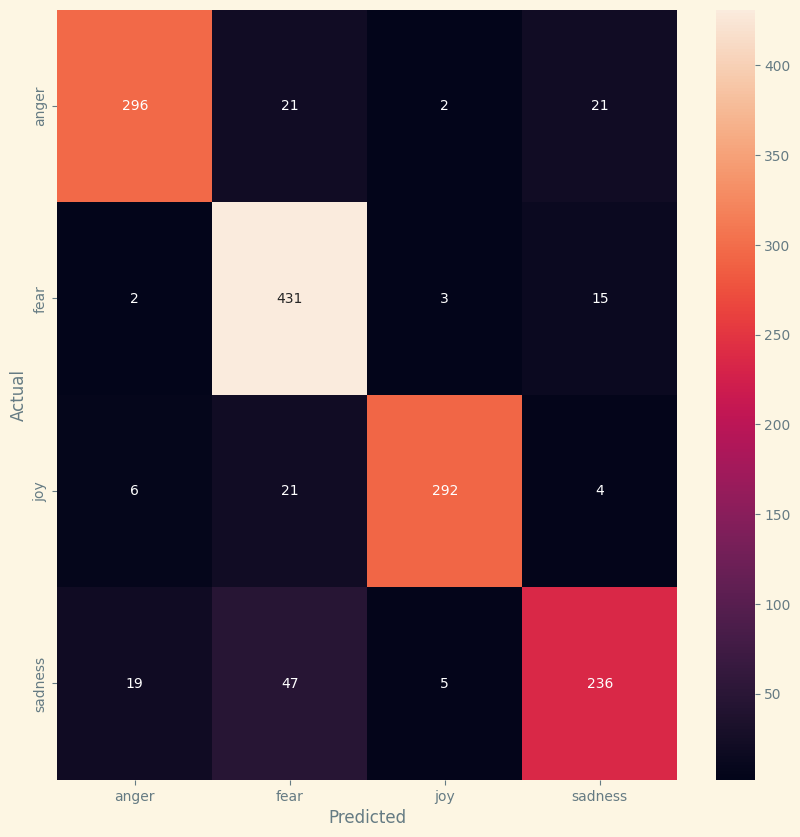

In [44]:
conf_mat = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Extracting the twitter data for the emotion predictions and sentiment

In [67]:
import tweepy
from tweepy import OAuthHandler
import json
import datetime as dt
import time
import os
import sys


'''
In order to use this script you should register a data-mining application
with Twitter.  Good instructions for doing so can be found here:
http://marcobonzanini.com/2015/03/02/mining-twitter-data-with-python-part-1/

After doing this you can copy and paste your unique consumer key,
consumer secret, access token, and access secret into the load_api()
function below.

The main() function can be run by executing the command: 
python twitter_search.py

I used Python 3 and tweepy version 3.5.0.  You will also need the other
packages imported above.
'''

def load_api():
    ''' Function that loads the twitter API after authorizing the user. '''

    consumer_key = ''
    consumer_secret = ''
    access_token = ''
    access_secret = ''
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    # load the twitter API via tweepy
    return tweepy.API(auth)

    
def tweet_search(api, query, max_tweets, max_id, since_id, geocode):
    ''' Function that takes in a search string 'query', the maximum
        number of tweets 'max_tweets', and the minimum (i.e., starting)
        tweet id. It returns a list of tweepy.models.Status objects. '''

    searched_tweets = []
    while len(searched_tweets) < max_tweets:
        remaining_tweets = max_tweets - len(searched_tweets)
        try:
            new_tweets = api.search(q=query, count=remaining_tweets,
                                    since_id=str(since_id),
				                    max_id=str(max_id-1))
#                                    geocode=geocode)
            print('found',len(new_tweets),'tweets')
            if not new_tweets:
                print('no tweets found')
                break
            searched_tweets.extend(new_tweets)
            max_id = new_tweets[-1].id
        except tweepy.TweepError:
            print('exception raised, waiting 15 minutes')
            print('(until:', dt.datetime.now()+dt.timedelta(minutes=15), ')')
            time.sleep(15*60)
            break # stop the loop
    return searched_tweets, max_id


def get_tweet_id(api, date='', days_ago=9, query='a'):
    ''' Function that gets the ID of a tweet. This ID can then be
        used as a 'starting point' from which to search. The query is
        required and has been set to a commonly used word by default.
        The variable 'days_ago' has been initialized to the maximum
        amount we are able to search back in time (9).'''

    if date:
        # return an ID from the start of the given day
        td = date + dt.timedelta(days=1)
        tweet_date = '{0}-{1:0>2}-{2:0>2}'.format(td.year, td.month, td.day)
        tweet = api.search(q=query, count=1, until=tweet_date)
    else:
        # return an ID from __ days ago
        td = dt.datetime.now() - dt.timedelta(days=days_ago)
        tweet_date = '{0}-{1:0>2}-{2:0>2}'.format(td.year, td.month, td.day)
        # get list of up to 10 tweets
        tweet = api.search(q=query, count=10, until=tweet_date)
        print('search limit (start/stop):',tweet[0].created_at)
        # return the id of the first tweet in the list
        return tweet[0].id


def write_tweets(tweets, filename):
    ''' Function that appends tweets to a file. '''

    with open(filename, 'a') as f:
        for tweet in tweets:
            json.dump(tweet._json, f)
            f.write('\n')


def main():
    ''' This is a script that continuously searches for tweets
        that were created over a given number of days. The search
        dates and search phrase can be changed below. '''



    ''' search variables: '''
    search_phrases = ['Pavelski', 'Lucic', 
                     'Ovechkin', 'Giroux',
                     'Jagr', 'John Tavares',
                     'Kucherov', 'Mrazek',
                     'Seguin', 'Pominville',
                     'Crosby', 'Lundqvist',
                     'Tarasenko', 'Patrick Kane',
                     'Cory Perry', 'Forsberg']
    time_limit = 1.5                           # runtime limit in hours
    max_tweets = 100                           # number of tweets per search (will be
                                               # iterated over) - maximum is 100
    min_days_old, max_days_old = 6, 7          # search limits e.g., from 7 to 8
                                               # gives current weekday from last week,
                                               # min_days_old=0 will search from right now
    USA = '39.8,-95.583068847656,2500km'       # this geocode includes nearly all American
                                               # states (and a large portion of Canada)
    

    # loop over search items,
    # creating a new file for each
    for search_phrase in search_phrases:

        print('Search phrase =', search_phrase)

        ''' other variables '''
        name = search_phrase.split()[0]
        json_file_root = name + '/'  + name
        os.makedirs(os.path.dirname(json_file_root), exist_ok=True)
        read_IDs = False
        
        # open a file in which to store the tweets
        if max_days_old - min_days_old == 1:
            d = dt.datetime.now() - dt.timedelta(days=min_days_old)
            day = '{0}-{1:0>2}-{2:0>2}'.format(d.year, d.month, d.day)
        else:
            d1 = dt.datetime.now() - dt.timedelta(days=max_days_old-1)
            d2 = dt.datetime.now() - dt.timedelta(days=min_days_old)
            day = '{0}-{1:0>2}-{2:0>2}_to_{3}-{4:0>2}-{5:0>2}'.format(
                  d1.year, d1.month, d1.day, d2.year, d2.month, d2.day)
        json_file = json_file_root + '_' + day + '.json'
        if os.path.isfile(json_file):
            print('Appending tweets to file named: ',json_file)
            read_IDs = True
        
        # authorize and load the twitter API
        api = load_api()
        
        # set the 'starting point' ID for tweet collection
        if read_IDs:
            # open the json file and get the latest tweet ID
            with open(json_file, 'r') as f:
                lines = f.readlines()
                max_id = json.loads(lines[-1])['id']
                print('Searching from the bottom ID in file')
        else:
            # get the ID of a tweet that is min_days_old
            if min_days_old == 0:
                max_id = -1
            else:
                max_id = get_tweet_id(api, days_ago=(min_days_old-1))
        # set the smallest ID to search for
        since_id = get_tweet_id(api, days_ago=(max_days_old-1))
        print('max id (starting point) =', max_id)
        print('since id (ending point) =', since_id)
        


        ''' tweet gathering loop  '''
        start = dt.datetime.now()
        end = start + dt.timedelta(hours=time_limit)
        count, exitcount = 0, 0
        while dt.datetime.now() < end:
            count += 1
            print('count =',count)
            # collect tweets and update max_id
            tweets, max_id = tweet_search(api, search_phrase, max_tweets,
                                          max_id=max_id, since_id=since_id,
                                          geocode=USA)
            # write tweets to file in JSON format
            if tweets:
                write_tweets(tweets, json_file)
                exitcount = 0
            else:
                exitcount += 1
                if exitcount == 3:
                    if search_phrase == search_phrases[-1]:
                        sys.exit('Maximum number of empty tweet strings reached - exiting')
                    else:
                        print('Maximum number of empty tweet strings reached - breaking')
                        break


if __name__ == "__main__":
    main()